In [7]:
import pandas as pd
from utils import search_best_parameters_database, count_canny, search_best_parameters_df
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
def result(dataset, image, min, max):
    df = pd.read_csv(dataset)

    def count_method(x):
        file = image + f"/{x}.png"
        return count_canny(file, min, max, center=True)

    df["count_method"] = df.file.apply(count_method)
    df["error"] = df["count"] - df["count_method"]
    df["error_abs"] = (df["count_method"] - df["count"]).abs()
    
    return df

In [3]:
def plot(df):
    quantiles = np.arange(0, 1, 0.1)
    y = [df.error_abs.quantile(i) for i in quantiles]

    plt.plot(quantiles*100, y)
    plt.ylabel("quantidade de arestas erradas")
    plt.xlabel("porcentagem")
    plt.show()


In [4]:
def show_results(df):
    lim_0 = df[df.error_abs < 1].shape[0] / df.shape[0]
    lim_1 = df[df.error_abs <= 1].shape[0] / df.shape[0]
    lim_2 = df[df.error_abs <= 2].shape[0] / df.shape[0]
    lim_3 = df[df.error_abs <= 3].shape[0] / df.shape[0]
    lim_4 = df[df.error_abs <= 4].shape[0] / df.shape[0]

    error = mean_absolute_error(df["count"].to_numpy(), df["count_method"].to_numpy())

    print(f"acerto = {lim_0} \n" +
          f"considerando +/- 1 = {lim_1*100}\n" +
          f"considerando +/- 2 = {lim_2*100}\n" +
          f"considerando +/- 3 = {lim_3*100}\n" +
          f"considerando +/- 4 = {lim_4*100}\n" +
          f"error (mean absolute error) = {error}")

# revised 1600

In [26]:
dataset = "../image/dbe/revised_database_cut_1600.csv"
image = "../image/dbe/classify_1600"

In [74]:
search_best_parameters_database(dataset, image, center=True, a=0, b=50)

(0, 8, 2.3360655737704916)

In [27]:
df = result(dataset, image, 0, 8)

In [28]:
show_results(df)

acerto = 0.16393442622950818 
considerando +/- 1 = 26.229508196721312
considerando +/- 2 = 55.73770491803278
considerando +/- 3 = 75.40983606557377
considerando +/- 4 = 88.52459016393442
error (mean absolute error) = 2.3360655737704916


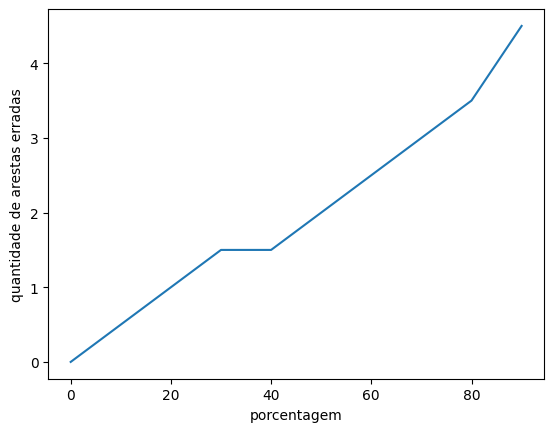

In [78]:
plot(df)

# revised 900

In [31]:
dataset = "../image/dbe/revised_database_cut_1600.csv"
image = "../image/dbe/classify_900"

In [82]:
search_best_parameters_database(dataset, image, center=True, a=0, b=50)

(0, 4, 1.7868852459016393)

In [32]:
df = result(dataset, image, 0, 4)

In [33]:
show_results(df)

acerto = 0.29508196721311475 
considerando +/- 1 = 40.98360655737705
considerando +/- 2 = 73.77049180327869
considerando +/- 3 = 85.24590163934425
considerando +/- 4 = 95.08196721311475
error (mean absolute error) = 1.7868852459016393


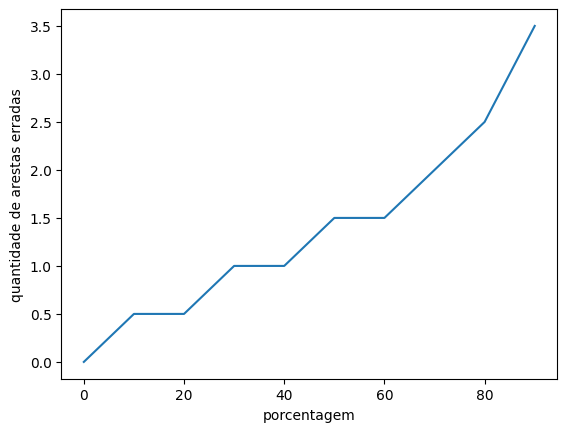

In [86]:
plot(df)

# revised 300

In [34]:
dataset = "../image/dbe/revised_database_cut_1600.csv"
image = "../image/dbe/classify_300"

In [90]:
search_best_parameters_database(dataset, image, center=True, a=0, b=50)

(0, 1, 5.39344262295082)

In [35]:
df = result(dataset, image, 0, 1)

In [36]:
show_results(df)

acerto = 0.04918032786885246 
considerando +/- 1 = 8.19672131147541
considerando +/- 2 = 18.0327868852459
considerando +/- 3 = 26.229508196721312
considerando +/- 4 = 36.0655737704918
error (mean absolute error) = 5.39344262295082


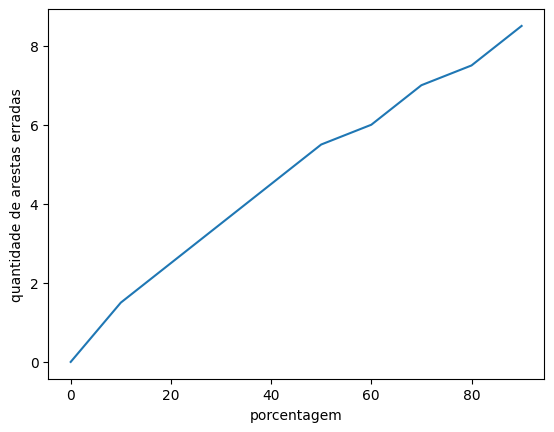

In [96]:
plot(df)

# Aleatory

In [37]:
dataset = "../image/dbe/database_1600.csv"
image = "../image/dbe/classify_1600"

In [61]:
search_best_parameters_database(dataset, image, center=True, a=0, b=50)

(0, 8, 3.1948051948051948)

In [38]:
df = result(dataset, image, 0, 8)

In [39]:
show_results(df)

acerto = 0.12987012987012986 
considerando +/- 1 = 25.97402597402597
considerando +/- 2 = 49.35064935064935
considerando +/- 3 = 64.93506493506493
considerando +/- 4 = 68.83116883116884
error (mean absolute error) = 3.1948051948051948


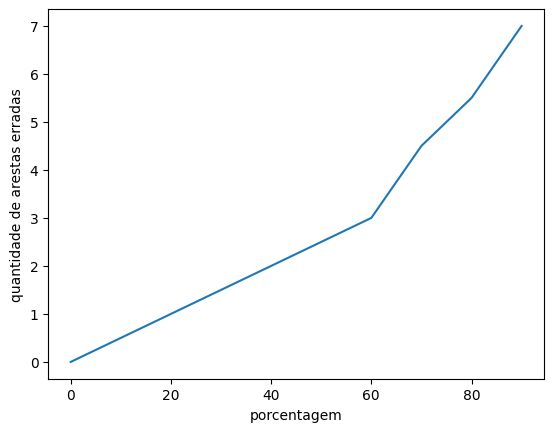

In [63]:
plot(df)

# count with find_peaks

In [40]:
from utils import count_find_peaks

df_peaks = pd.read_csv("../image/dbe/revised_database_cut_1600.csv")

def count_method(x):
    file = f"../image/dbe/classify_1600/{x}.png"
    return count_find_peaks(file, a=2.2) - 1

df_peaks["count_method"] = df_peaks.file.apply(count_method)
df_peaks["error"] = df_peaks["count"] - df_peaks["count_method"]
df_peaks["error_abs"] = (df_peaks["count_method"] - df_peaks["count"]).abs()

error = mean_absolute_error(df_peaks["count"].to_numpy(), df_peaks["count_method"].to_numpy())

In [42]:
show_results(df_peaks)

acerto = 0.16393442622950818 
considerando +/- 1 = 21.311475409836063
considerando +/- 2 = 36.0655737704918
considerando +/- 3 = 54.09836065573771
considerando +/- 4 = 70.49180327868852
error (mean absolute error) = 3.3062593144560353
